<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/7_desafio_modelos_classificacao/desafio_modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Modelos de Classificação

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

## Dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Modelos de Classificação/dados_alzheimer_classificacao.csv')
df.head()

,Age,Sex,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,66,M,19,5,21,1.0,1474,0.768,1.11,0
1,79,M,14,5,22,2.0,1630,0.722,0.82,0
2,88,M,8,5,22,0.0,1432,0.668,1.24,1
3,74,M,14,3,24,1.0,1276,0.833,1.29,0
4,70,M,18,4,25,0.0,1605,0.677,1.28,0


## Questões

### 1.
Faça uma análise exploratória dos dados e identifique os principais
preditores da variável Group.Trate valores ausentes, codifique
variáveis categóricas e normalize os dados, se necessário.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     200 non-null    int64  
 1   Sex     200 non-null    object 
 2   EDUC    200 non-null    int64  
 3   SES     200 non-null    int64  
 4   MMSE    200 non-null    int64  
 5   CDR     200 non-null    float64
 6   eTIV    200 non-null    int64  
 7   nWBV    200 non-null    float64
 8   ASF     200 non-null    float64
 9   Group   200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,74.820000,12.335000,3.110000,19.57500,0.830000,1494.100000,0.757850,1.048050,0.270000
std,9.094015,4.214449,1.469249,5.93807,0.730595,104.309358,0.060322,0.148604,0.445074
min,60.000000,6.000000,1.000000,10.00000,0.000000,1234.000000,0.651000,0.800000,0.000000
25%,67.000000,8.750000,2.000000,14.00000,0.000000,1420.000000,0.702000,0.910000,0.000000
50%,74.000000,12.000000,3.000000,20.00000,0.500000,1497.500000,0.767000,1.040000,0.000000
75%,83.000000,16.000000,4.000000,25.00000,1.000000,1559.250000,0.813250,1.170000,1.000000
max,89.000000,19.000000,5.000000,29.00000,2.000000,1764.000000,0.850000,1.300000,1.000000


In [5]:
df_ = df.copy()

In [6]:
# Codificar sexo (F: 0, M: 1)
df_['Sex'] = df_['Sex'].map({'F': 0, 'M': 1})

In [7]:
# verifica balanceamento das classes
df_['Group'].value_counts()

,count
Group,
0,146
1,54


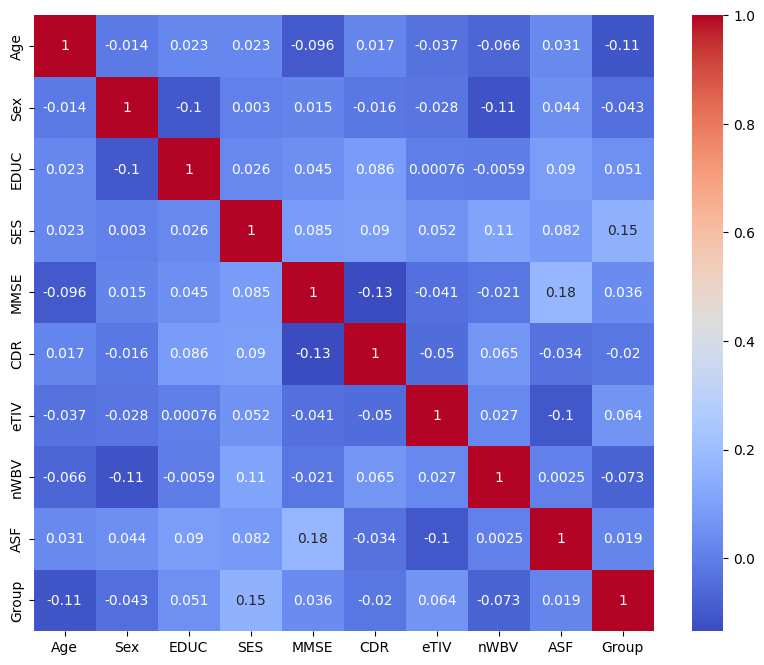

In [8]:
# Correlação
plt.figure(figsize=(10,8))
sns.heatmap(df_.corr(), annot=True, cmap='coolwarm')
plt.show()

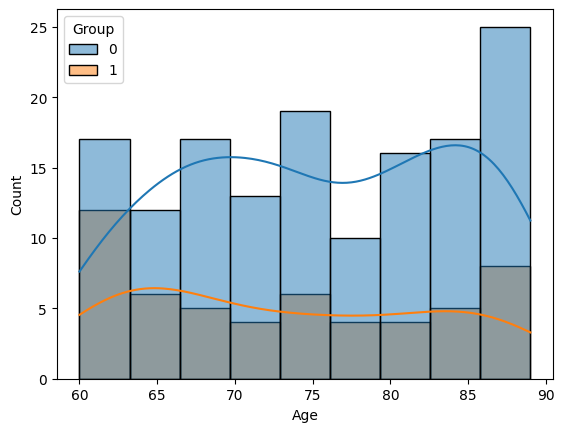

In [9]:
# Distribuição das idades por grupo
sns.histplot(data=df_, x='Age', hue='Group', kde=True)
plt.show()

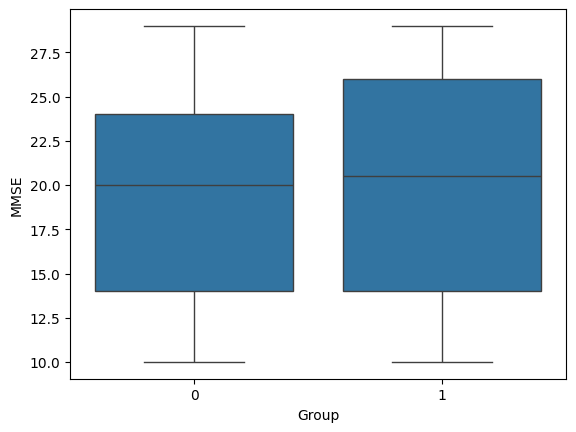

In [10]:
# Boxplot MMSE por grupo
sns.boxplot(x='Group', y='MMSE', data=df)
plt.show()


### 2.
Treine um modelo de classificação (Regressão Logística, Árvore de
Decisão ou Random Forest).

In [11]:
# separação dos dados
X = df_.drop('Group', axis=1)
y = df_['Group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [12]:
# normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# tratar desbalanceamento
## oversampling (aumentar a minoria) - Técnica: SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [14]:
# model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
# model.fit(X_train, y_train)
model.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

### 3.
Avalie o modelo utilizando:
- Matriz de confusão
- Acurácia
- Precisão
- Revocação (Recall)
- F1-score (opcional, mas recomendado)

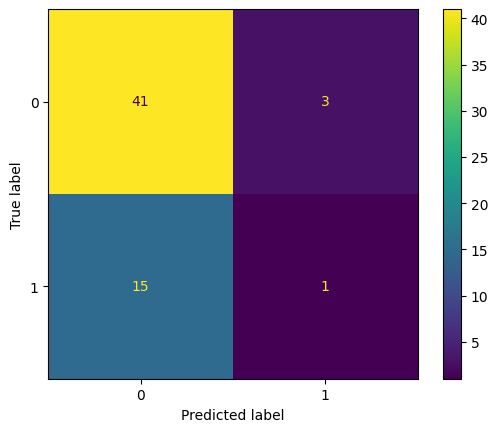

Acurácia: 0.7
Precisão: 0.25
Recall: 0.0625
F1-score: 0.1


In [15]:
# predito
y_pred = model.predict(X_test)

# matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Precisão:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


### 4.
Qual a importância relativa de cada variável no modelo final?

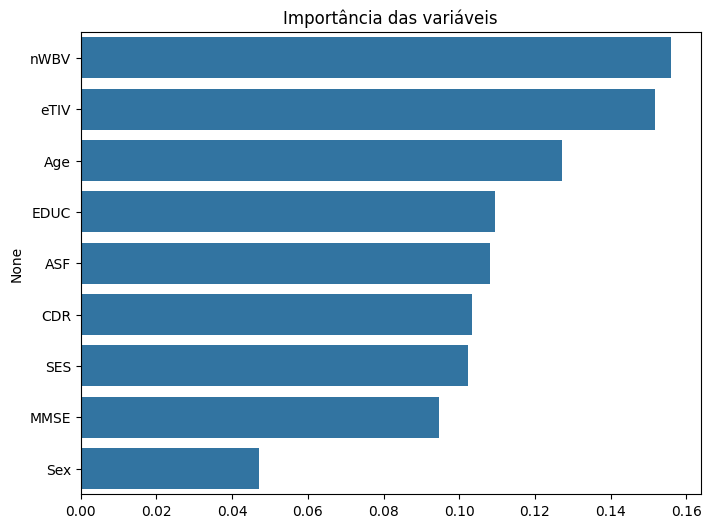

In [16]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importância das variáveis")
plt.show()


### 5.
O modelo apresenta bom desempenho em ambos os grupos (com e sem demência)?

<font color='blue'> Após aplicar técnicas para tratar o desbalanceamento das classes, utilizando SMOTE e o parâmetro class_weight='balanced' no modelo:
<br><br>
* Acurácia: 70% — Reflete um desempenho global, mas continua sendo influenciada pelo desequilíbrio das classes.
<br>
* Precisão: 25% — Das previsões feitas como "com demência", apenas 25% estavam corretas.
<br>
* Recall: 6,25% — O modelo identificou apenas 1 em 16 casos reais de demência, indicando uma capacidade extremamente baixa de detecção da classe minoritária.
<br>
* F1-score: 0,10 — Reflete o baixo equilíbrio entre precisão e recall.
</font>

### 6.
É possível identificar pacientes em estágio inicial de demência com esse modelo?

<font color='blue'>Apesar da aplicação de técnicas para balanceamento, o modelo segue com desempenho muito insatisfatório na detecção de pacientes com demência. Ele continua fortemente enviesado para prever a classe majoritária (sem demência). Isso indica que o modelo não é adequado para aplicação em cenários onde é crítico identificar casos de demência.</font>

### 7.
O modelo apresenta overfitting ou underfitting? Como isso pode ser ajustado?

<font color='blue'>O comportamento observado é típico de underfitting, ou seja, o modelo tem baixa capacidade de capturar padrões dos dados, principalmente na classe minoritária.</font>